In [1]:
import os
import sys
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nipes_data_fcts as nidf
import me_data_fcts as medf
from statannotations.Annotator import Annotator
import ipyparallel as ipp

In [2]:
import importlib
importlib.reload(medf)

<module 'me_data_fcts' from '/home/leni/git/evolutionary_robotics_framework/experiments/scripts/me_data_fcts.py'>

In [3]:
cluster = ipp.Cluster(n=8)
cluster.start_cluster_sync()

Starting 8 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


<Cluster(cluster_id='1728313111-12z8', profile='default', controller=<running>, engine_sets=['1728313112'])>

In [9]:
rclient = ipp.Client(cluster_id=cluster.cluster_id)

In [10]:
with rclient[:].sync_imports():
    import os
    import sys
    import numpy as np
    import seaborn as sns
    import pandas as pd
    import matplotlib.pyplot as plt
    import nipes_data_fcts as nidf
    import me_data_fcts as medf
    from statannotations.Annotator import Annotator

importing os on engine(s)
importing sys on engine(s)
importing numpy on engine(s)
importing seaborn on engine(s)
importing pandas on engine(s)
importing matplotlib.pyplot on engine(s)
importing nipes_data_fcts on engine(s)
importing me_data_fcts on engine(s)
importing Annotator from statannotations.Annotator on engine(s)


In [11]:
repo_folder = "/home/leni/remote-logs/"

In [12]:
mehk_flat_folder = repo_folder + "mehk_full/subset/"
mehk_t1_folder = repo_folder + "mehk_terrains/terrain_1"
mehk_t2_folder = repo_folder + "mehk_terrains/terrain_2"
mehk_t3_folder = repo_folder + "mehk_terrains/terrain_3"

In [82]:
parent_fits = []
for folder in os.listdir(mehk_flat_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_flat_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_flat_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_flat_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate"])
par_fit_data["environment"] = "flat"

meim_1_7_13-48-4-4412-2005753728
meim_28_7_15-26-15-5072-1856930231
meim_31_6_10-54-15-5808-2000983534
meim_4_6_16-59-49-9078-3493767385
meim_6_6_12-28-38-8210-1037330512


In [83]:
parent_fits = []
for folder in os.listdir(mehk_t1_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t1_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_t1_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_t1_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data2 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate"])
par_fit_data2["environment"] = "terrain 1"

meim_2_9_16-0-2-2510-981315967
meim_2_9_16-2-34-4685-2856092688
meim_2_9_16-2-37-7660-3195513713
meim_2_9_23-44-37-7637-3892191582
meim_3_9_9-29-13-3371-4106505290


In [84]:
parent_fits = []
for folder in os.listdir(mehk_t2_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t2_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_t2_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_t2_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data3 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate"])
par_fit_data3["environment"] = "terrain 2"

meim_4_9_14-14-38-8789-1998805565
meim_4_9_17-25-13-3406-3768567963
meim_4_9_22-48-35-5499-2119517595
meim_4_9_23-56-4-4793-1375202458
meim_4_9_5-53-48-8643-1423503452


In [85]:
parent_fits = []
for folder in os.listdir(mehk_t3_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t3_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_t3_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_t3_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data4 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate"])
par_fit_data4["environment"] = "terrain 3"

meim_3_9_10-8-16-6652-2725286737
meim_3_9_10-8-16-6743-255508923
meim_3_9_20-14-17-7307-1661965293
meim_4_9_2-0-11-1667-3956483303
meim_4_9_2-21-45-5878-3946153200


In [86]:
fit_data = pd.concat([par_fit_data,par_fit_data2,par_fit_data3,par_fit_data4]).reset_index(drop=True)


In [87]:
fit_max_data = []
for env in fit_data["environment"].drop_duplicates():
    tmp_data = fit_data.loc[fit_data["environment"] == env]
    for rep in tmp_data["replicate"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["replicate"] == rep]
        fit_max_data.append(pd.DataFrame(tmp_data2.max(numeric_only=True)).transpose())
        fit_max_data[-1]["replicate"] = rep
        fit_max_data[-1]["environment"] = env
            
fit_max_data = pd.concat(fit_max_data)
fit_max_data.index = [i for i in range(len(fit_max_data))]

# Exploration score

/tmp/ipykernel_101245/3906647373.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["flat","terrain 1","terrain 2","terrain 3"])


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

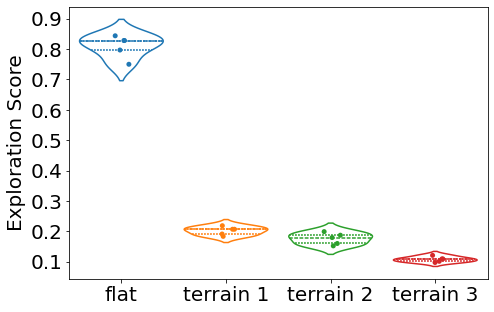

In [88]:
fig = plt.gcf()
fig.set_size_inches(7.5,5)
ax = sns.violinplot(fit_max_data,x="environment",hue="environment",y="fitness",fill=False,inner="quart")
sns.stripplot(fit_max_data,x="environment",hue="environment",y="fitness")
ax.set_xlabel("")
ax.set_xticklabels(["flat","terrain 1","terrain 2","terrain 3"])
ax.set_ylabel("Exploration Score")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [89]:
parent_descs = []
for folder in os.listdir(mehk_flat_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_flat_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_flat_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data1 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data1["environment"] = "flat"

meim_1_7_13-48-4-4412-2005753728
meim_28_7_15-26-15-5072-1856930231
meim_31_6_10-54-15-5808-2000983534
meim_4_6_16-59-49-9078-3493767385
meim_6_6_12-28-38-8210-1037330512


In [90]:
parent_descs = []
for folder in os.listdir(mehk_t1_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t1_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_t1_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data2 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data2["environment"] = "terrain 1"

meim_2_9_16-0-2-2510-981315967
meim_2_9_16-2-34-4685-2856092688
meim_2_9_16-2-37-7660-3195513713
meim_2_9_23-44-37-7637-3892191582
meim_3_9_9-29-13-3371-4106505290


In [91]:
parent_descs = []
for folder in os.listdir(mehk_t2_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t2_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_t2_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data3 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data3["environment"] = "terrain 2"

meim_4_9_14-14-38-8789-1998805565
meim_4_9_17-25-13-3406-3768567963
meim_4_9_22-48-35-5499-2119517595
meim_4_9_23-56-4-4793-1375202458
meim_4_9_5-53-48-8643-1423503452


In [92]:
parent_descs = []
for folder in os.listdir(mehk_t3_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t3_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_t3_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data4 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data4["environment"] = "terrain 3"

meim_3_9_10-8-16-6652-2725286737
meim_3_9_10-8-16-6743-255508923
meim_3_9_20-14-17-7307-1661965293
meim_4_9_2-0-11-1667-3956483303
meim_4_9_2-21-45-5878-3946153200


In [93]:
desc_data = pd.concat([par_desc_data1,par_desc_data2,par_desc_data3,par_desc_data4]).reset_index(drop=True)


In [94]:
desc_data = pd.merge(desc_data,fit_data,how="left",on=["iteration","robot index","replicate","discretized number of robots","number of individuals","number new inds","environment"])
desc_data = desc_data.drop_duplicates(subset=['robot index','replicate'])

# Components diversity

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

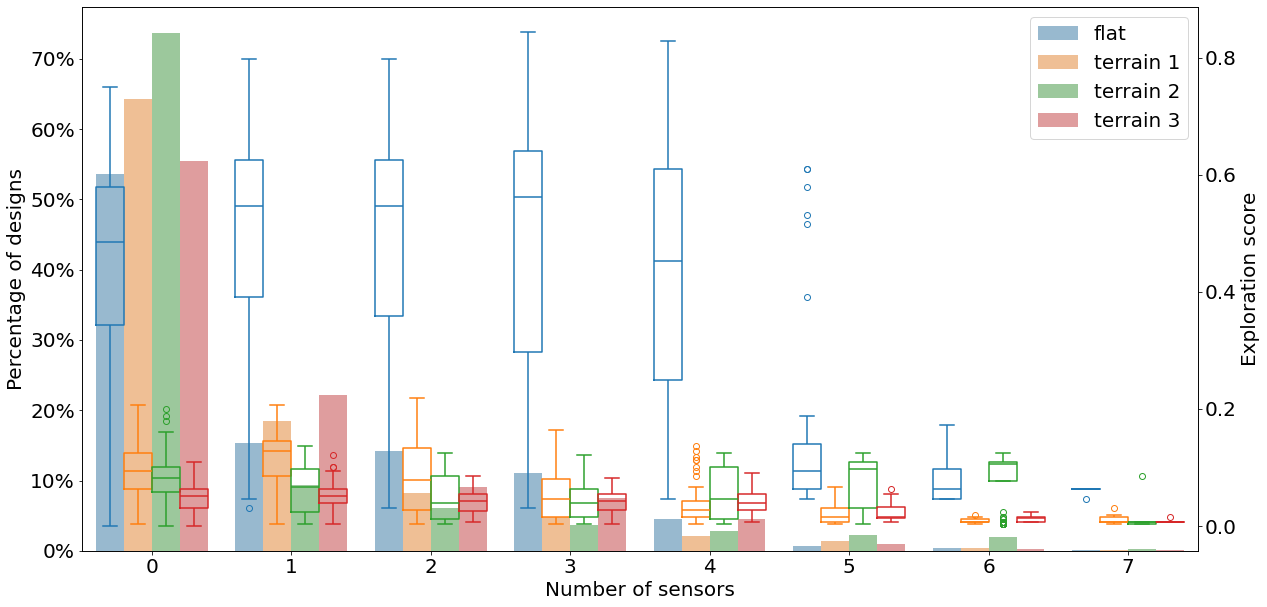

In [95]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['sensors'], normalize='index')
df1 = df.melt(var_name='sensors', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="sensors",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of sensors")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="sensors",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

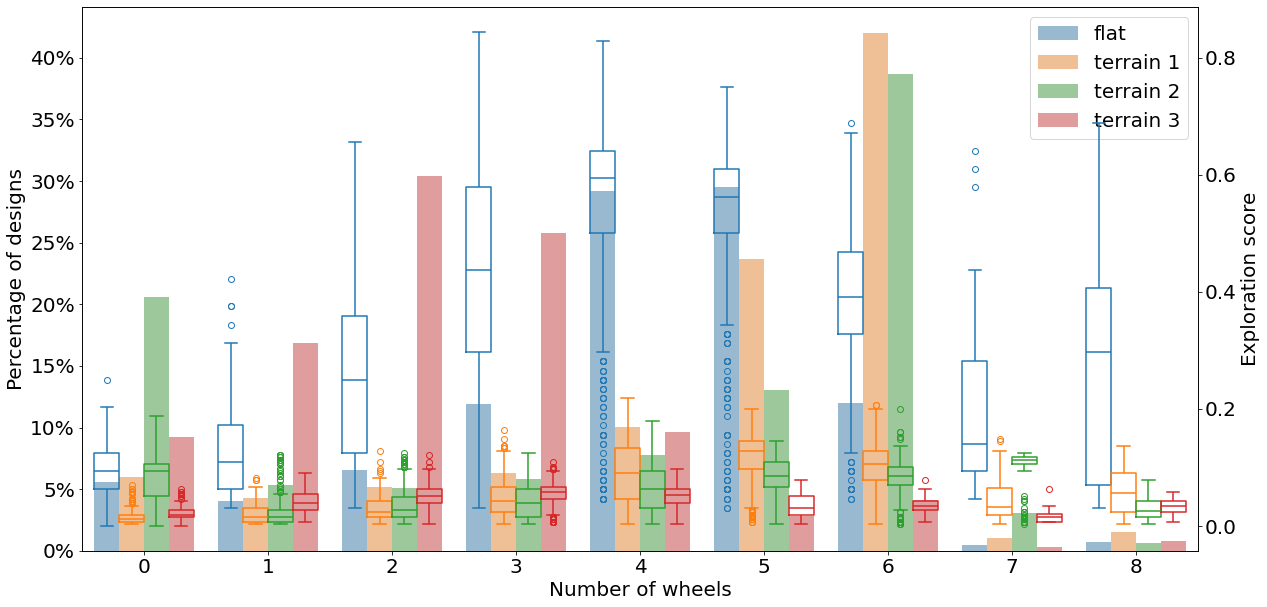

In [96]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['wheels'], normalize='index')
df1 = df.melt(var_name='wheels', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="wheels",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of wheels")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="wheels",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

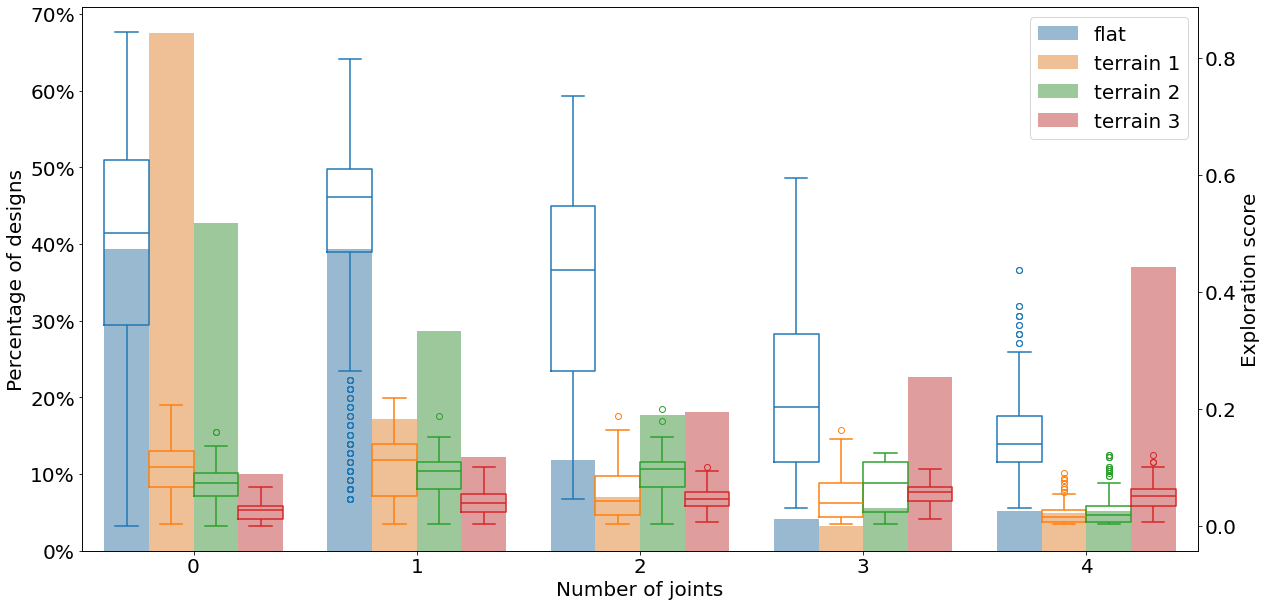

In [97]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['joints'], normalize='index')
df1 = df.melt(var_name='joints', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="joints",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of joints")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="joints",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

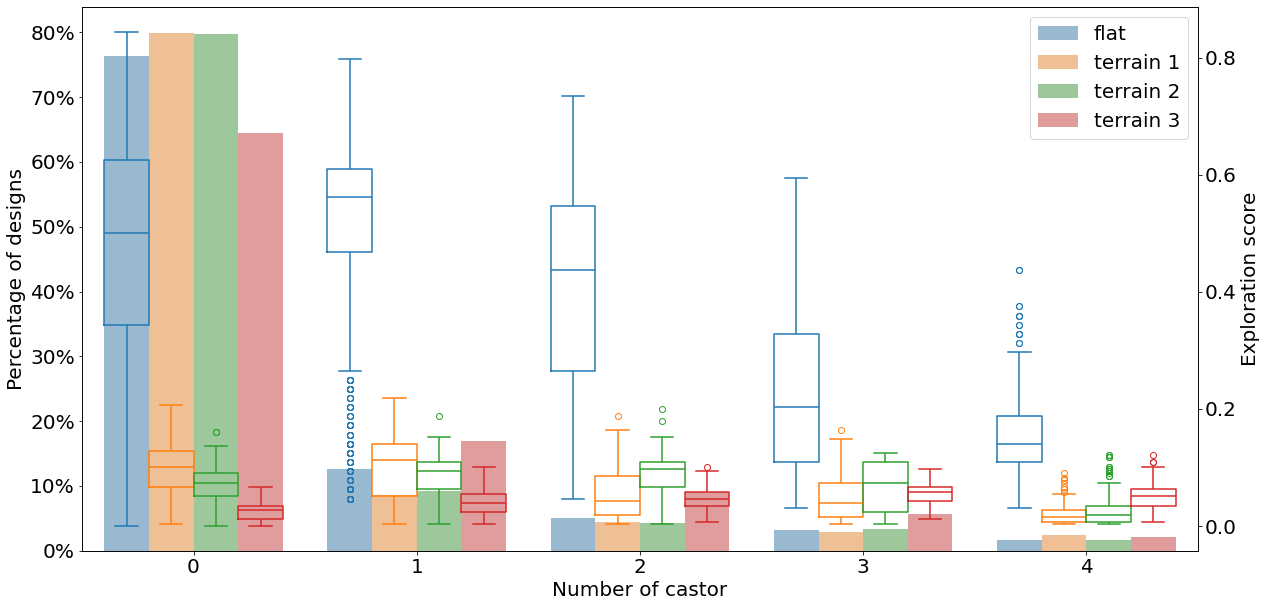

In [98]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['casters'], normalize='index')
df1 = df.melt(var_name='casters', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="casters",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of castor")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="joints",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

# Chassis diversity

In [104]:
desc_data = pd.concat([par_desc_data1,par_desc_data2,par_desc_data3,par_desc_data4]).reset_index(drop=True)
desc_data = pd.merge(desc_data,fit_data,how="left",on=["iteration","robot index","replicate","discretized number of robots","number of individuals","number new inds","environment"])
desc_data = desc_data.drop_duplicates(subset=['robot index','replicate'])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

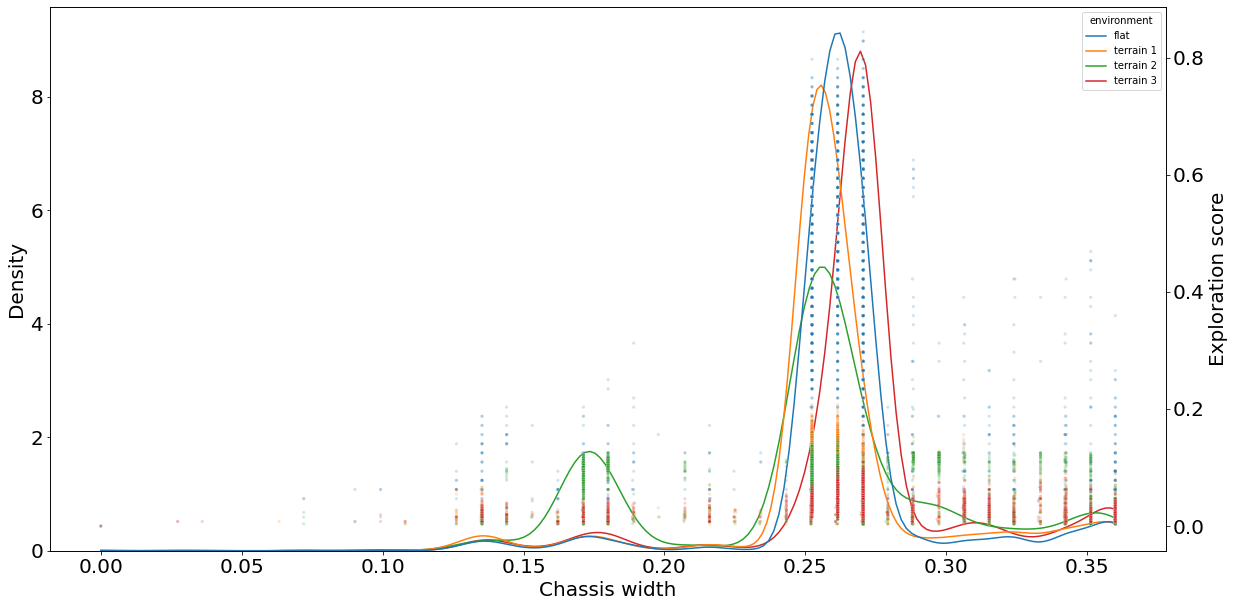

In [106]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="width",hue="environment",cut=0,hue_order=["flat","terrain 1","terrain 2","terrain 3"])
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis width")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="width",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2,hue_order=["flat","terrain 1","terrain 2","terrain 3"])
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

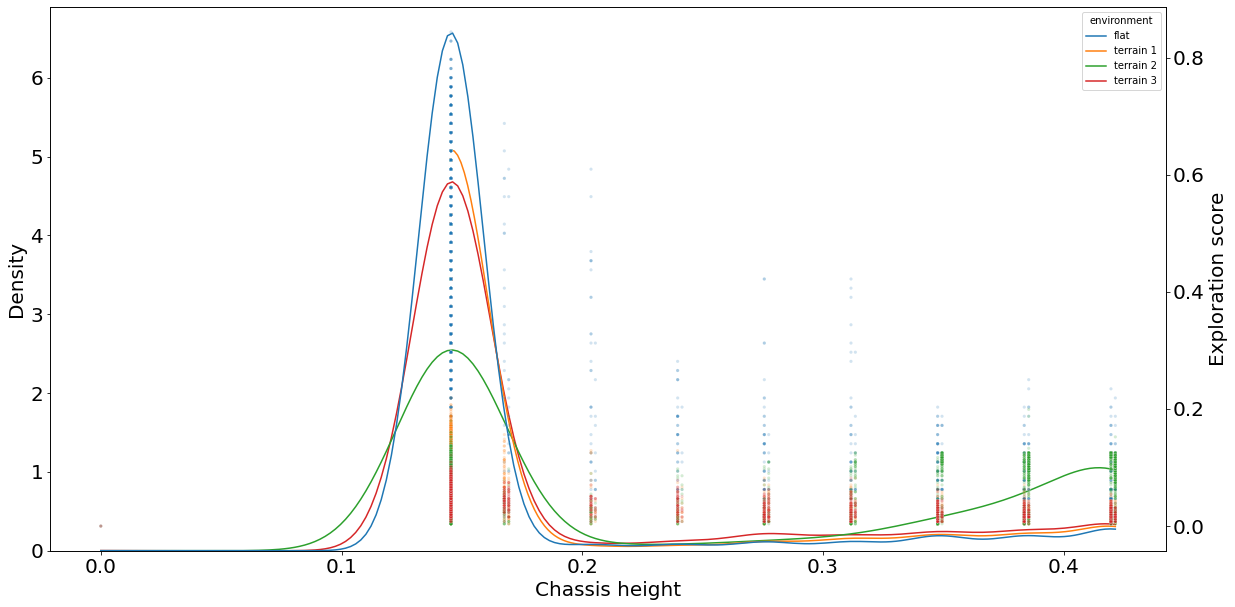

In [107]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="height",hue="environment",cut=0)
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis height")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="height",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

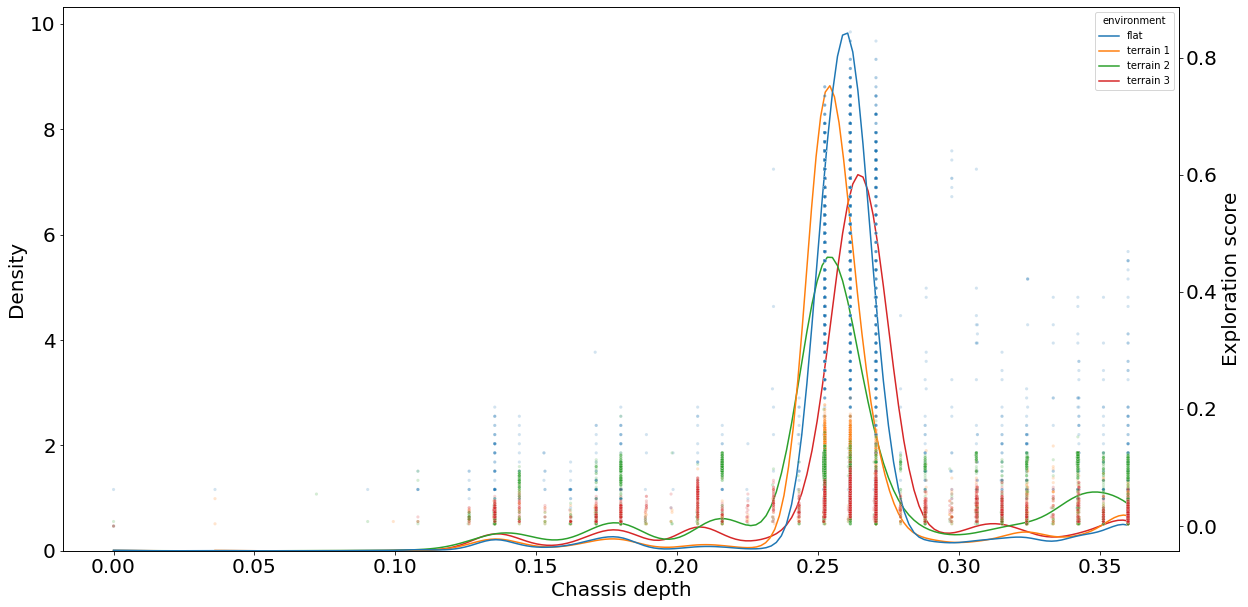

In [108]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="depth",hue="environment",cut=0)
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis depth")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="depth",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

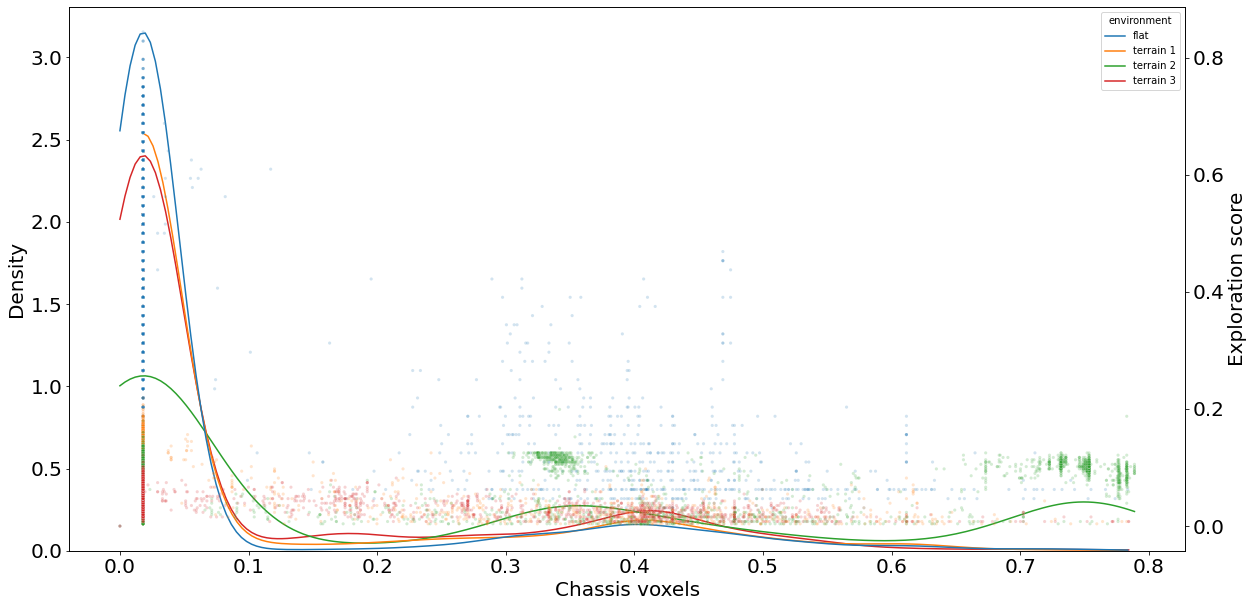

In [109]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="voxels",hue="environment",cut=0)
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis voxels")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="voxels",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

# Trajectories

In [5]:
import importlib
importlib.reload(medf)  

<module 'me_data_fcts' from '/home/leni/git/evolutionary_robotics_framework/experiments/scripts/me_data_fcts.py'>

In [17]:
%%px --targets 0 --noblock
repo_folder = "/home/leni/remote-logs/"
mehk_t1_folder = repo_folder + "mehk_terrains/terrain_1"
parent_fits = []
trajectories = []
for folder in os.listdir(mehk_t1_folder):
    print(folder)
    for file in os.listdir(mehk_t1_folder + "/" + folder):
        if file.split("_")[0] == "traj":
            print(file)
            trajectories +=  [[int(file.split("_")[1])] + t for t in me_data_fcts.load_trajectory(mehk_t1_folder + "/" + folder + "/" + file,100)]
    
traj_data = pd.DataFrame(data=trajectories,columns=["robot index","iteration","x","y","z"])


<AsyncResult(%px): pending>

In [14]:
%%px --targets 1 --noblock
repo_folder = "/home/leni/remote-logs/"
mehk_t1_folder = repo_folder + "mehk_terrains/terrain_1"
parent_fits = []
trajectories = []
for folder in os.listdir(mehk_t2_folder):
    print(folder)
    for file in os.listdir(mehk_t2_folder + "/" + folder):
        if file.split("_")[0] == "traj":
            print(file)
            trajectories +=  [[int(file.split("_")[1])] + t for t in medf.load_trajectory(mehk_t2_folder + "/" + folder + "/" + file,100)]
    
traj_data2 = pd.DataFrame(data=trajectories,columns=["robot index","iteration","x","y","z"])

<AsyncResult(%px): pending>

In [15]:
%%px --targets 2 --noblock
parent_fits = []
trajectories = []
for folder in os.listdir(mehk_t3_folder):
    print(folder)
    for file in os.listdir(mehk_t3_folder + "/" + folder):
        if file.split("_")[0] == "traj":
            print(file)
            trajectories +=  [[int(file.split("_")[1])] + t for t in medf.load_trajectory(mehk_t2_folder + "/" + folder + "/" + file,100)]
    
traj_data3 = pd.DataFrame(data=trajectories,columns=["robot index","iteration","x","y","z"])

<AsyncResult(%px): pending>

In [18]:
%pxresult

RemoteError: [0:execute] NameError: name 'medf' is not defined